In [1]:
%pylab inline

import os
from styles import slides

def model(K, pars):
    a, b = pars
    return a*K + b*K**2

pars_OIII = [  217.4835193,   1062.12222244]
pars_Halpha = [  278.81867414,  1338.57486397]

Populating the interactive namespace from numpy and matplotlib


In [2]:
sdir = "../inputs/real_deal/jpas/"

jlist = sorted([os.path.join(root, file) for root, subs, files in os.walk(sdir) for file in files if "_JPAS_" in file])
slist = [name.replace("JPAS", "SPEC").replace("jpas", "spec") for name in jlist]

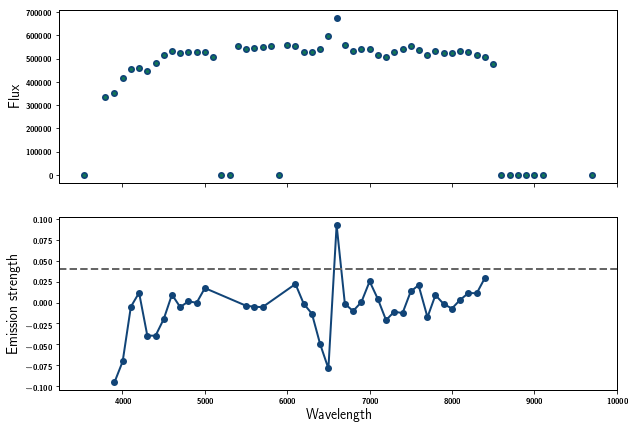

In [3]:
i = 0

wls, fls = loadtxt(slist[i], usecols=(0,1), unpack=True)
wlj, flj = loadtxt(jlist[i], usecols=(0,1), unpack=True)

wi, k1, k2 = array([(wlj[i+1], flj[i]/flj[i+1], flj[i+2]/flj[i]) for i in xrange(wlj.size-2) if all(flj[i:i+3]!=0)]).T

K = 1 - (k1+k2)/2
ew = model(K, pars_Halpha)

em = ones(wlj.size, dtype=np.bool)
for j in xrange(wi.size):
    if K[j]>0.04: em[wlj==wi[j]] = False

fig, axs = subplots(2, 1, sharex=True, figsize=(10, 7))
#axs[0].plot(wls, fls, "-")
axs[0].plot(wlj, flj, "o", mew=0)
axs[0].plot(wlj[em], flj[em], ".")
axs[1].plot(wi, K, "o-", mew=0)
axs[1].axhline(0.04, ls="--", color="0.4")

axs[1].set_xlabel("Wavelength")
axs[0].set_ylabel("Flux")
axs[1].set_ylabel("Emission strength")